In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('C:/Users/tapan/OneDrive/Desktop/ML/Thermal_data/Training_data (1).xlsx')

In [3]:
df.head()

,Average Temp (AT),Exhaust Vacuum (EV),Ambient Pressure (AP),Relative Humidity (RH),Electrical Power (EP)
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [4]:
df.isnull().sum()

Average Temp (AT)          0
 Exhaust Vacuum (EV)       0
Ambient Pressure (AP)      0
 Relative Humidity (RH)    0
Electrical Power (EP)      0
dtype: int64

# EDA

# Plotting Histogram

<Figure size 720x1080 with 0 Axes>

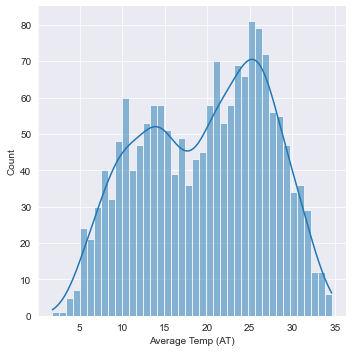

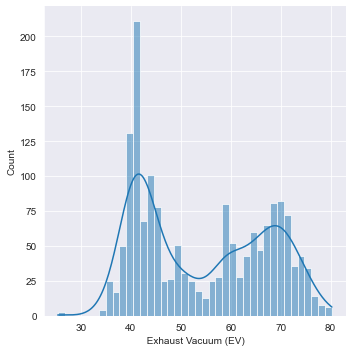

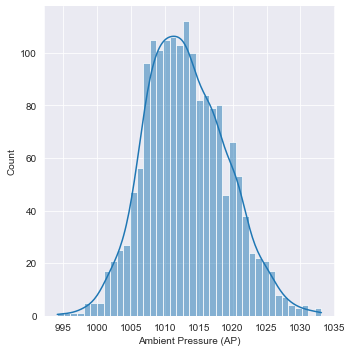

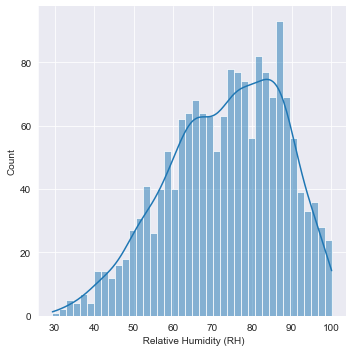

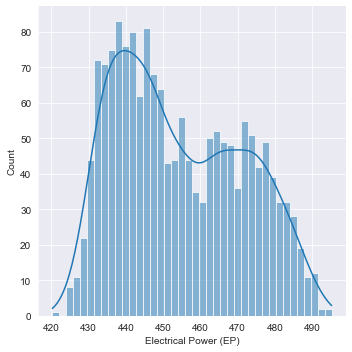

In [5]:
plt.figure(figsize=(10,15))
sns.set_style('darkgrid')
pn = 1
for col in df:
    sns.displot(df[str(col)],bins=40,kde=True)
    

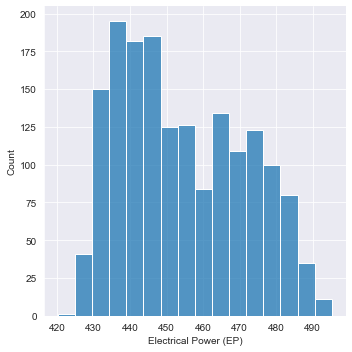

In [6]:
sns.displot(df['Electrical Power (EP)'])

In [7]:
for col in df:
    print(col)

Average Temp (AT)
 Exhaust Vacuum (EV)
Ambient Pressure (AP)
 Relative Humidity (RH)
Electrical Power (EP)


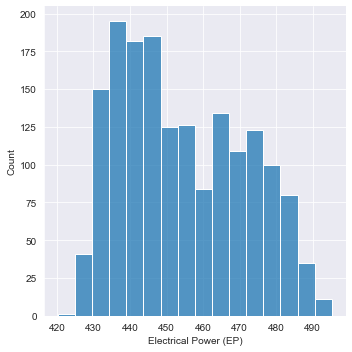

In [8]:
col = 'Electrical Power (EP)'
sns.displot(df[col])

<Figure size 720x1080 with 0 Axes>

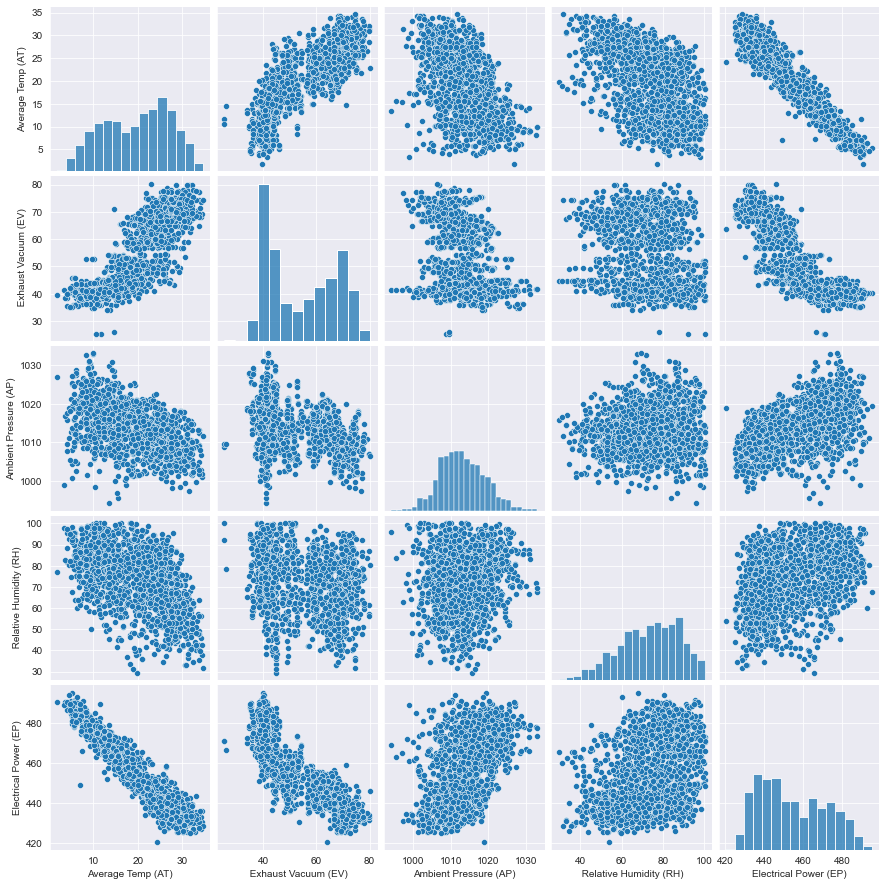

In [9]:
plt.figure(figsize=(10,15))
sns.pairplot(df)

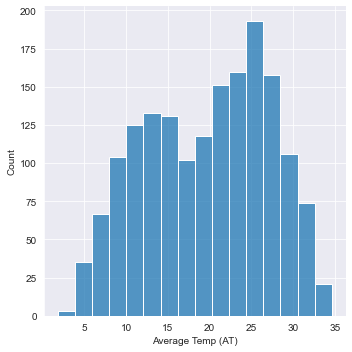

In [10]:
sns.displot(df['Average Temp (AT)'])

# Making Traning and valdation data

In [11]:
from sklearn.model_selection import train_test_split

In [243]:

y = df[['Electrical Power (EP)']]
X = df.iloc[:, :4].values

In [244]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=101)

# Scaling data into Standard normal Distribution

In [245]:
from sklearn.preprocessing import StandardScaler

In [246]:
scalar = StandardScaler()

In [16]:
X_train = np.array(X_train)
y_train = np.array(y_train)
y_train= y_train.reshape((-1,1))
X_val = np.array(X_val)
y_val = np.array(y_val)
y_val= y_val.reshape((-1,1))

In [247]:
scaler_X = StandardScaler()
#scaler_Y = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
#y_train = scaler_Y.fit_transform(y_train)
X_val = scaler_X.transform(X_val)
#y_val = scaler_Y.transform(y_val)

# bulding a Model Using Neural Network

In [248]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential

In [343]:
model = Sequential([
    keras.Input(shape=X_train.shape[1]),
    keras.layers.Dense(16,activation=tf.nn.relu),
    keras.layers.Dense(8,activation=tf.nn.relu),
    keras.layers.Dense(4,activation=tf.nn.relu),
    keras.layers.Dense(1),
])
print(model.summary())

Model: "sequential_255"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_820 (Dense)           (None, 16)                80        
                                                                 
 dense_821 (Dense)           (None, 8)                 136       
                                                                 
 dense_822 (Dense)           (None, 4)                 36        
                                                                 
 dense_823 (Dense)           (None, 1)                 5         
                                                                 
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________
None


In [344]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),loss=tf.keras.losses.mse,metrics=['mse'],)
model.fit(X_train,y_train,batch_size=32,verbose=None,epochs=150,validation_data=(X_val,y_val))

# Error plot

In [345]:
looss = model.history.history
loos = pd.DataFrame(looss)
loos.head()

,loss,mse,val_loss,val_mse
0,206258.843750,206258.843750,205217.125000,205217.125000
1,203374.468750,203374.468750,199566.171875,199566.171875
2,191498.265625,191498.265625,178431.890625,178431.890625
3,155951.484375,155951.484375,126021.687500,126021.687500
4,90086.156250,90086.156250,53688.480469,53688.480469


Text(0, 0.5, 'MSE')

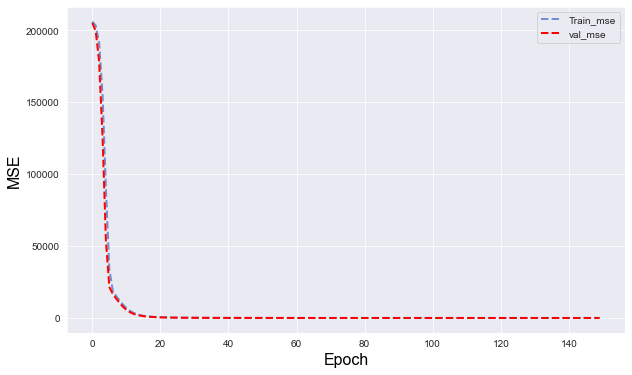

In [346]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
font = {'color':'#000000','size':16}
plt.plot(range(150),loos['mse'],color='#728FCE',ls = 'dashed',lw=2,label='Train_mse')
plt.plot(range(150),loos['val_mse'],color='r',ls = 'dashed' ,lw=2,label = 'val_mse')
plt.legend(loc='upper right')
plt.xlabel('Epoch',font)
plt.ylabel('MSE',font)


In [347]:
df2 = pd.read_excel('C:/Users/tapan/OneDrive/Desktop/ML/Thermal_data/testing_data (1).xlsx ')


In [348]:
df2 = df2.drop(['Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12'],axis=1)

In [349]:
df2 = df2.dropna()

In [350]:
X_test = df2.iloc[:,:4]
X_test = scaler_X.transform(X_test)

In [351]:
pre = model.predict(X_test)

In [352]:
y_test = df2.iloc[:,4:]

In [353]:
from sklearn.metrics import mean_squared_error

# Mean Square error Before Hyperparameter Tuning

In [354]:
df_ans = pd.DataFrame(pre,columns=['pre'])

In [355]:
df_ans['y_test'] = df2['Electrical Power (EP)']

In [356]:
df_ans.head()

,pre,y_test
0,459.407684,450.69
1,428.947540,427.95
2,444.853516,445.66
3,479.436920,482.99
4,471.501312,465.61


In [357]:
mean_squared_error(df_ans['pre'],df_ans['y_test'])

21.271796637779858

# Plot between Predicted Data and Actual Result

Text(0, 0.5, 'Prediction')

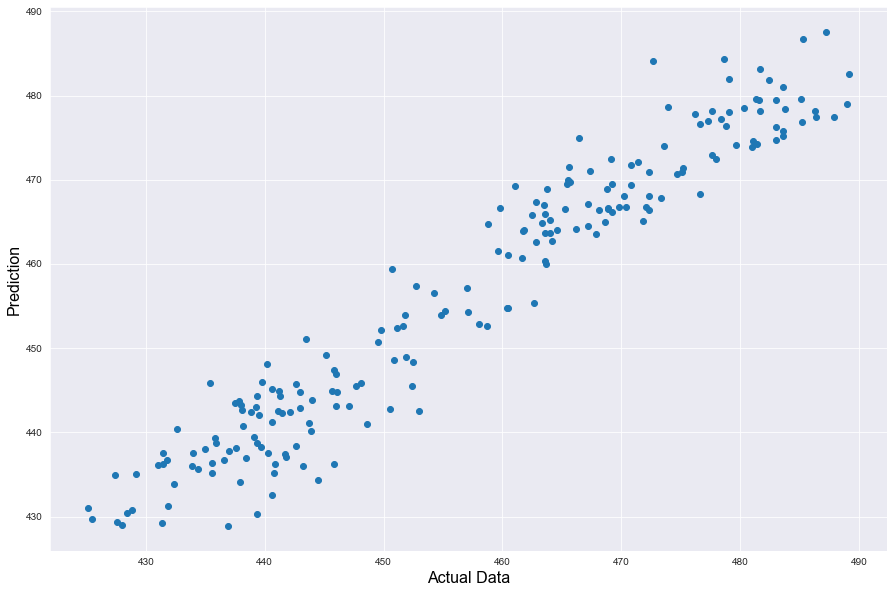

In [358]:
plt.figure(figsize=(15,10))
sns.set_style('darkgrid')
#plt.plot(x='y_test',y='pre', data=df_ans, color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12)
#sns.scatterplot(x='y_test',y='pre',data=df_ans)
plt.scatter(df_ans['y_test'],df_ans['pre'],marker='o')
font = {'color':'#000000','size':16}

plt.xlabel('Actual Data',fontdict=font)
plt.ylabel('Prediction',fontdict=font)

# Hyperparmeter Tuning

In [364]:
def build_model(learning_rate = 3e-3,input_shape=[4],batch_size = 32):
    model = Sequential([keras.Input(shape=X_train.shape[1]),
    keras.layers.Dense(16,activation=tf.nn.relu),
    keras.layers.Dense(8,activation=tf.nn.relu),
    keras.layers.Dense(4,activation=tf.nn.relu),
    keras.layers.Dense(1)])
   
    optimizer = keras.optimizers.Adam(learning_rate = learning_rate)
    model.compile(loss='mse',optimizer=optimizer,metrics = ['mse'])
    return model

In [365]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

C:\Users\tapan\AppData\Local\Temp/ipykernel_32104/1709004121.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


# RandomsearchCV is used for hyperparameter tuning 
# hyperparameter
# Learning rate
# Batch Size

In [366]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

In [367]:
parametr = {'learning_rate':reciprocal(3e-4,3e-2),'batch_size':[16,32,64,128]}

In [368]:
rnd_search_cv = RandomizedSearchCV(keras_reg,parametr,n_iter=10,cv=3)
rnd_search_cv.fit(X_train,y_train,epochs=200,validation_data=(X_val,y_val),callbacks = [keras.callbacks.EarlyStopping(patience=10)],verbose=None)

4/4 [==============================] - 0s 5ms/step - loss: 200421.1250 - mse: 200421.1250


RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x00000248C59A8F10>,
                   param_distributions={'batch_size': [16, 32, 64, 128],
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000248C59A8130>})

In [369]:
rnd_search_cv.best_params_

{'batch_size': 64, 'learning_rate': 0.004751635437746975}

# Now build New Model With Tuned Parameter

In [370]:
model_tuned = rnd_search_cv.best_estimator_.model

In [371]:
print(model_tuned.summary())

Model: "sequential_292"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_968 (Dense)           (None, 16)                80        
                                                                 
 dense_969 (Dense)           (None, 8)                 136       
                                                                 
 dense_970 (Dense)           (None, 4)                 36        
                                                                 
 dense_971 (Dense)           (None, 1)                 5         
                                                                 
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________
None


# Prediction Using train model with Tuned parameter

In [372]:

def pre(X_new):
    X = scaler_X.transform(X_new)
    pre = model_tuned.predict(X_new)
    return pre

In [373]:
df_test = pd.read_excel('C:/Users/tapan/OneDrive/Desktop/ML/Thermal_data/testing_data (1).xlsx ')

In [374]:
df_test = df_test.drop(['Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12'],axis=1)

In [375]:
df_test = df_test.dropna()

In [376]:
X_test_data = df_test.iloc[:,:4]
X_test_data = scaler_X.transform(X_test_data)


In [377]:
prediction = pre(X_test_data)

In [378]:
df_answer =  pd.DataFrame(prediction,columns=['pre'])

In [379]:
df_answer['y_test_data'] = df_test['Electrical Power (EP)']

In [380]:
df_answer.head()

,pre,y_test_data
0,459.061707,450.69
1,427.080475,427.95
2,443.759277,445.66
3,480.114929,482.99
4,472.072754,465.61


Text(0, 0.5, 'Prediction')

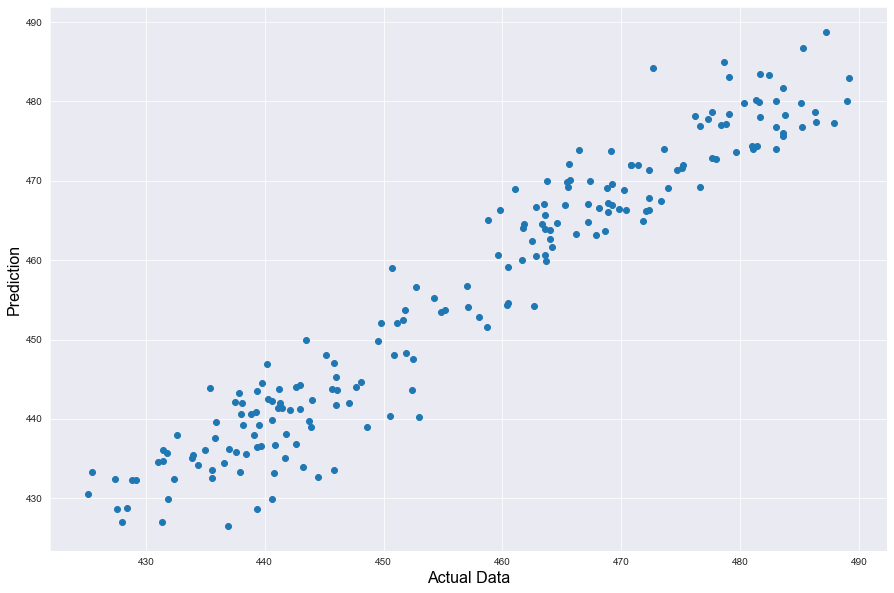

In [381]:
plt.figure(figsize=(15,10))
sns.set_style('darkgrid')
#plt.plot(x='y_test',y='pre', data=df_ans, color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12)
#sns.scatterplot(x='y_test',y='pre',data=df_ans)
plt.scatter(df_answer['y_test_data'],df_answer['pre'],marker='o')
font = {'color':'#000000','size':16}

plt.xlabel('Actual Data',fontdict=font)
plt.ylabel('Prediction',fontdict=font)

In [382]:
mean_squared_error(df_answer['pre'],df_answer['y_test_data'])

22.58361888154039